# **Анализ Част. II**

## **Зад 1. Златно сечение**
- Какво прави този код? Защо златното сечение в случая е полезно?

Минимумът е приблизително при x* = [ 1.0227957  -1.52821796  2.25927594]
Стойност f(x*) = -1.070348


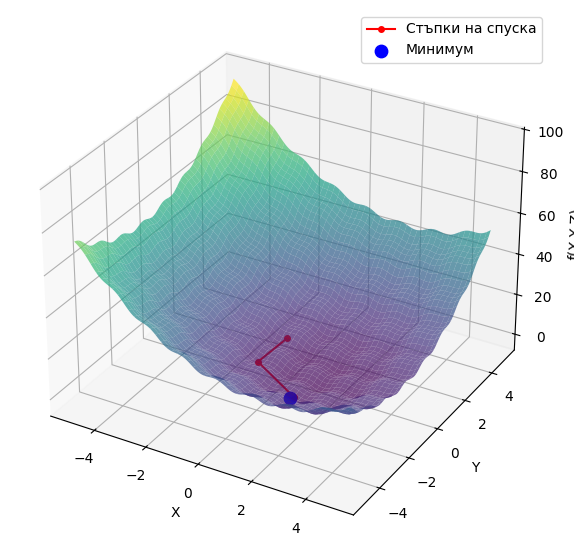

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y, z):
    return (x - 2)**2 + (y + 1)**2 + (z - 3)**2 + np.sin(5*x) + np.sin(5*y) + np.sin(5*z)

def grad_f(x, y, z):
    df_dx = 2*(x - 2) + 5*np.cos(5*x)
    df_dy = 2*(y + 1) + 5*np.cos(5*y)
    df_dz = 2*(z - 3) + 5*np.cos(5*z)
    return np.array([df_dx, df_dy, df_dz])

def golden_section_search(phi, a, b, tol=1e-5):
    tau = (np.sqrt(5) - 1) / 2  # ≈ 0.618
    x1 = b - tau * (b - a)
    x2 = a + tau * (b - a)
    f1, f2 = phi(x1), phi(x2)

    while (b - a) > tol:
        if f1 > f2:
            a = x1
            x1, f1 = x2, f2
            x2 = a + tau * (b - a)
            f2 = phi(x2)
        else:
            b = x2
            x2, f2 = x1, f1
            x1 = b - tau * (b - a)
            f1 = phi(x1)
    return (a + b) / 2

def gradient_descent_with_golden_section_3d(x0, tol=1e-5, max_iter=200):
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    for _ in range(max_iter):
        grad = grad_f(*x)
        if np.linalg.norm(grad) < tol:
            break
        phi = lambda alpha: f(*(x - alpha * grad))
        alpha = golden_section_search(phi, 0, 1)
        x = x - alpha * grad
        trajectory.append(x.copy())
    return np.array(trajectory)

x0 = [0.0, 0.0, 0.0]
path = gradient_descent_with_golden_section_3d(x0)
xmin = path[-1]
fmin = f(*xmin)

print(f"Минимумът е приблизително при x* = {xmin}")
print(f"Стойност f(x*) = {fmin:.6f}")

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x_vals = np.linspace(-5, 5, 200)
y_vals = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y, 0)  # фиксираме z = 0 за визуализация

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.plot(path[:,0], path[:,1], f(path[:,0], path[:,1], path[:,2]), 
        color='red', marker='o', markersize=4, label='Стъпки на спуска')
ax.scatter(xmin[0], xmin[1], fmin, color='blue', s=80, label='Минимум', zorder=5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y,Z)')
ax.legend()
plt.show()

## **Зад 2. Анализ на данни**
- Представете си, че сте анализатори на данни и получавате четири набора от данни. Всеки набор съдържа 11 точки `(x,y)`.
``` python
x1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

x2 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])

x3 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

quartet = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
``` 
- За всеки набор знаете следното: средната стойност е 9, дисперсията на извадката на x е 11, средната стойност на у е ~7.5, дисперсията на извадката на x е ~4.125 и корелацията между х и у е ~0,816.
- Какво можете да кажете за данните? Как ще ги анализирате? Какви операции ще извършите върху тях? Има ли някаква връзка между данните? Апроксимация? Метод на градиента? Метод на Нютон-Рафсън? Множители на Лагранж? Якобиан? Хесиан? Как се нарича този набор от данни?

## **Зад 3. Линейна регресия**


Да се напише програма, която реализира линейна регресия върху дадени експериментални данни. Имаме зависимост между променливите 
x и y, която предполагаемо е линейна:
$$
y = ax + b + ε
$$
Да се намерят параметрите `a` и `b`, които минимизират средната квадратична грешка между наблюдаваните и предсказаните стойности. Да се визуализира резултатът с графика.

## **Зад 4. Логистична регресия**
- Използвайки кода долу, обясенете какво е логистична регресия и как работи тя? С какво логистичната регресия е различна от линейната?

``` r
set.seed(123)
n <- 100
x1 <- runif(n, 0, 10)
x2 <- runif(n, 0, 5)
X <- cbind(1, x1, x2)
y <- ifelse(1 + 0.5*x1 - 0.3*x2 + rnorm(n) > 1.5, 1, 0)

sigmoid <- function(z) {
  1 / (1 + exp(-z))
}

log_loss <- function(y, y_pred) {
  -mean(y*log(y_pred) + (1-y)*log(1-y_pred))
}

gradient_descent <- function(X, y, lr = 0.01, n_iter = 10000) {
  m <- nrow(X)
  n <- ncol(X)
  beta <- rep(0, n)

  for (i in 1:n_iter) {
    z <- X %*% beta
    y_pred <- sigmoid(z)
    gradient <- t(X) %*% (y_pred - y) / m
    beta <- beta - lr * gradient
  }
  return(beta)
}

beta_hat <- gradient_descent(X, y)
beta_hat
```

```
         [,1]
   -1.7469362
x1  0.9155717
x2 -0.3257482
```